In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from sklearn.model_selection import train_test_split

In [3]:
# inserting header in columns
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# data input
df = pd.read_csv('../data/housing.csv', delimiter=r'\s+', names=columns)

In [4]:
X = df[['LSTAT']]
y = df[['MEDV']]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

In [7]:
def exponential(x, a, b, c):
    return a * np.exp(-b * x) + c

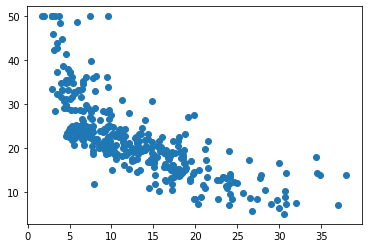

In [8]:
plt.scatter(X_train, y_train)
plt.show()

In [9]:
popt, pcov = curve_fit(exponential, X_train['LSTAT'], y_train['MEDV'])

c:\xpe\projects\boston-house-price-prediction\venv\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [10]:
popt

array([41.35376155,  0.13851077, 12.09394074])

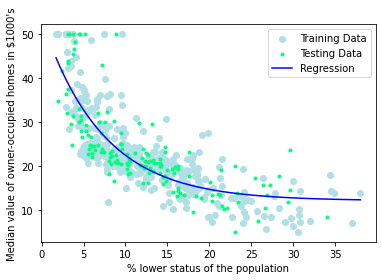

In [46]:
plt.scatter(X_train, y_train, color='#B0E0E6', label='Training Data')

x_line = np.arange(X_train['LSTAT'].min(), X_train['LSTAT'].max(), 0.01)

plt.scatter(X_test['LSTAT'], y_test['MEDV'], color='#00FF7F', marker='.', label='Testing Data')

plt.plot(x_line, exponential(x_line, *popt), color='blue', label='Regression')

plt.legend(loc="upper right")
plt.xlabel("% lower status of the population")
plt.ylabel("Median value of owner-occupied homes in $1000's")

plt.show()